In [31]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [32]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df = pd.read_csv("train.csv") #Reading the dataset in a dataframe using Pandas
df.head(5)

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [33]:
df['application_date'] = pd.to_datetime(df['application_date'])
df.dtypes

application_date    datetime64[ns]
segment                      int64
branch_id                  float64
state                       object
zone                        object
case_count                 float64
dtype: object

In [34]:
df = df.groupby('application_date')['case_count'].sum().reset_index()

In [35]:
df = df.set_index('application_date')
df.index

DatetimeIndex(['2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08',
               '2017-04-09', '2017-04-10',
               ...
               '2019-07-14', '2019-07-15', '2019-07-16', '2019-07-17',
               '2019-07-18', '2019-07-19', '2019-07-20', '2019-07-21',
               '2019-07-22', '2019-07-23'],
              dtype='datetime64[ns]', name='application_date', length=844, freq=None)

In [36]:
y = df['case_count'].resample('MS').mean()

In [37]:
y['2017':]

application_date
2017-04-01     6321.466667
2017-05-01     6575.903226
2017-06-01    10424.500000
2017-07-01    11229.806452
2017-08-01    12891.064516
2017-09-01    15006.466667
2017-10-01    15268.193548
2017-11-01    15484.733333
2017-12-01    16514.774194
2018-01-01    17702.290323
2018-02-01    18745.428571
2018-03-01    21121.451613
2018-04-01    17429.933333
2018-05-01    19335.161290
2018-06-01    23011.366667
2018-07-01    22853.967742
2018-08-01    21335.806452
2018-09-01    21912.333333
2018-10-01    22429.096774
2018-11-01    20387.200000
2018-12-01    19770.903226
2019-01-01    20283.000000
2019-02-01    20108.750000
2019-03-01    24294.935484
2019-04-01    18111.266667
2019-05-01    19169.032258
2019-06-01    19894.100000
2019-07-01    17028.521739
Freq: MS, Name: case_count, dtype: float64

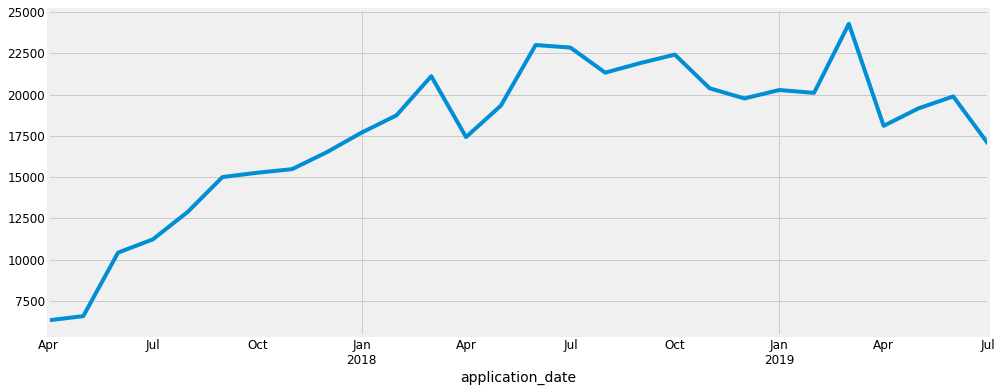

In [39]:
y.plot(figsize=(15, 6))

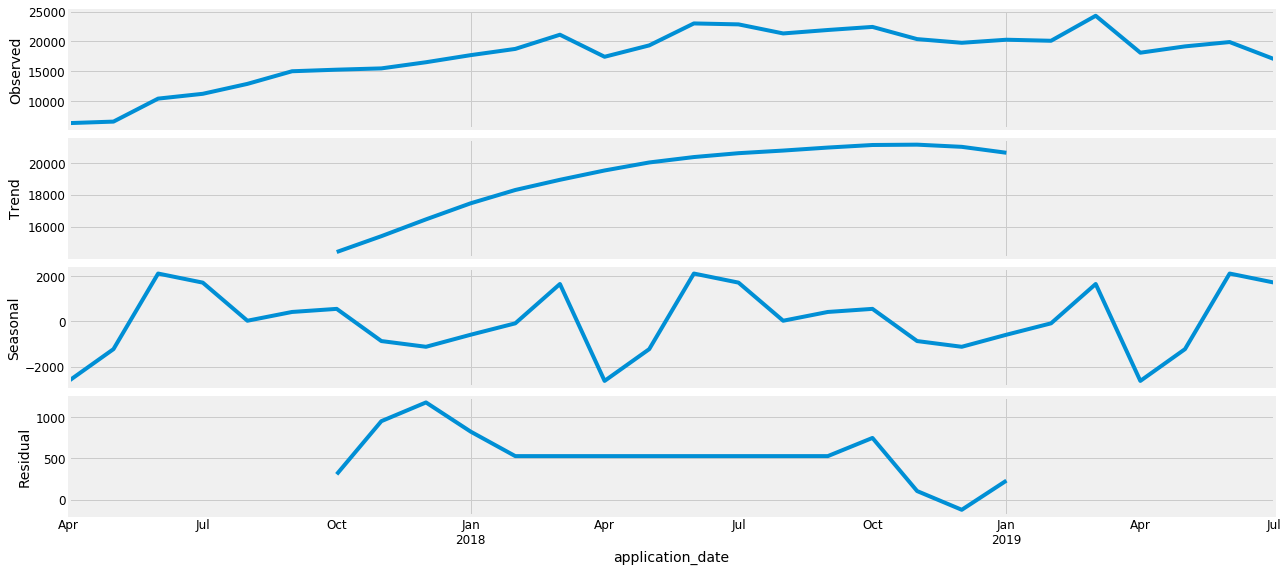

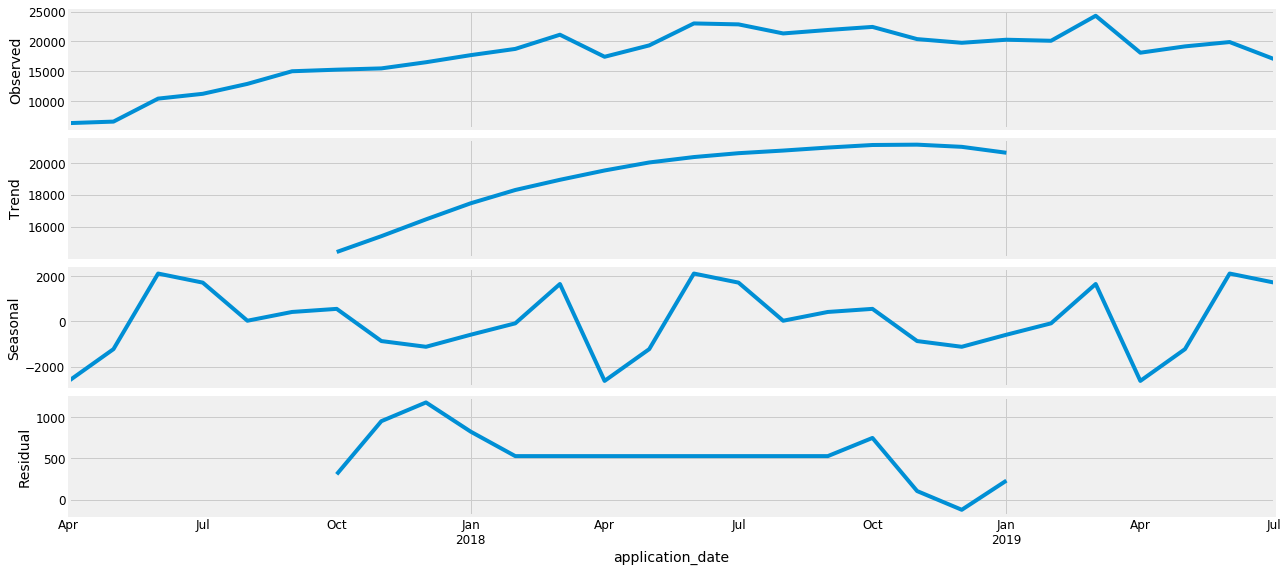

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
fig

In [41]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [43]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:609.3515562119796
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:309.9677316022517
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:330.79214551764454
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:78.15780512381188
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:572.2522252811675
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:272.71074496238737
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:318.1395767078368
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:77.85446866226414
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:478.04043318669994
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:252.8325784796782
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:271.80707681272924
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:58.974758649688226
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:458.2142594467136
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:236.46421104471978
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:273.7984651579073
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:58.32610308431994
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:497.272178548207
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:270.62677744954414
ARIM

In [45]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2033    454.521      0.003      0.998    -889.642     892.049
ma.L1         -1.0000   1262.076     -0.001      0.999   -2474.623    2472.623
ar.S.L12       0.0285   1639.687   1.74e-05      1.000   -3213.698    3213.755
sigma2      2.074e+05      0.001   1.71e+08      0.000    2.07e+05    2.07e+05


ValueError: operands could not be broadcast together with shapes (9,) (0,) (9,) 

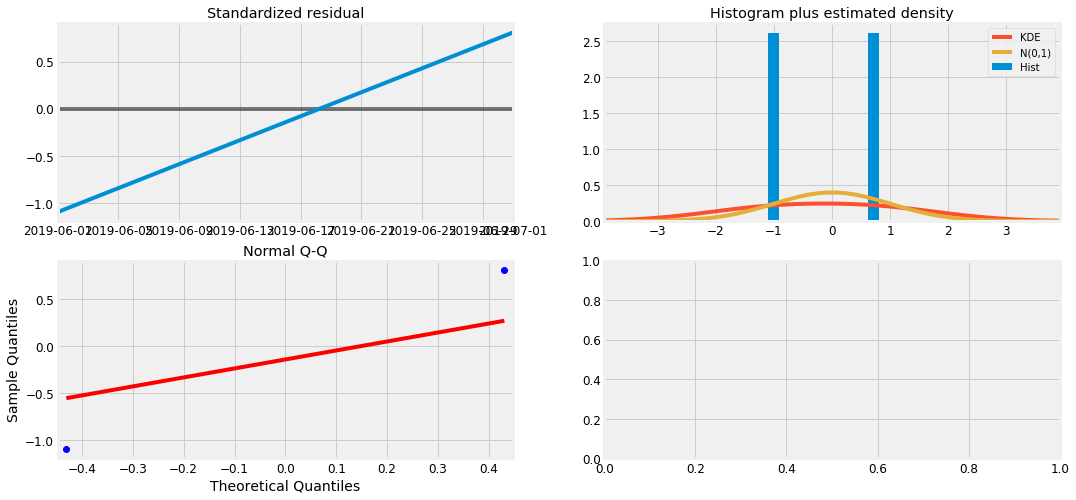

In [50]:
results.plot_diagnostics(figsize=(16, 8))

In [55]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
# pred_ci = pred.conf_int()
# ax = y['2017':].plot(label='observed')
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)
# ax.set_xlabel('Date')
# ax.set_ylabel('Furniture Sales')
# plt.legend()
# plt.show()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [56]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

NameError: name 'pred' is not defined

TypeError: 'module' object is not callable

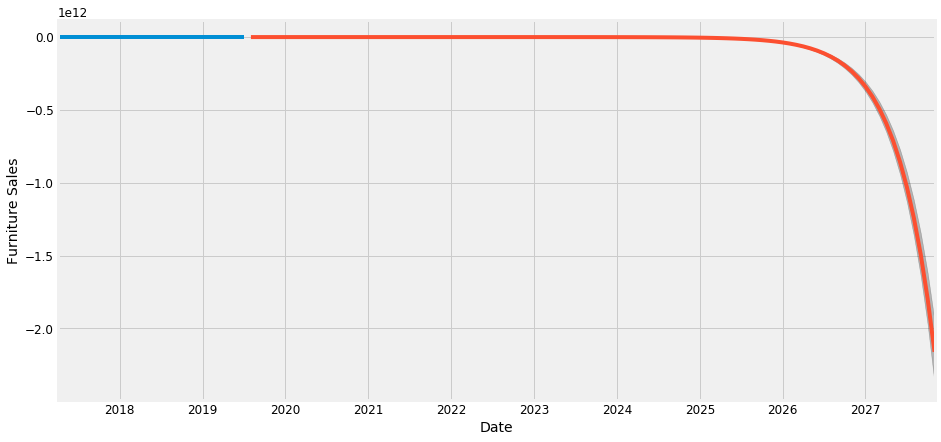

In [57]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [13]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [15]:
#df['Self_Employed'].value_counts()
df['Self_Employed'].fillna('No',inplace=True)

In [16]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
     return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

TypeError: "value" parameter must be a scalar, dict or Series, but you passed a "DataFrame"

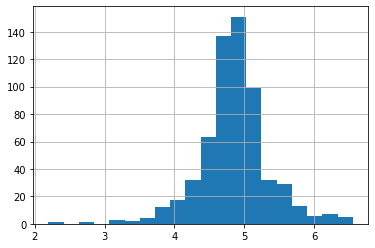

In [17]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

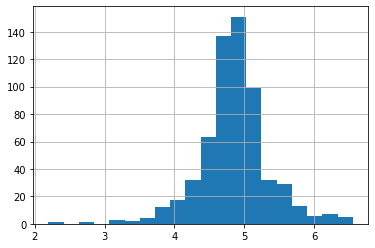

In [18]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20)

In [19]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object